In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install openpyxl

In [3]:
df=pd.read_csv('dataset.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [4]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [5]:
# Step 1. Encode binary columns (Yes/No --> 1/0)
binary_cols=['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Smoking_History', 'Heart_Disease']
df[binary_cols]=df[binary_cols].replace({'Yes':1,'No':0})

C:\Users\jsrri\AppData\Local\Temp\ipykernel_21848\2706397625.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols]=df[binary_cols].replace({'Yes':1,'No':0})


In [7]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,0,1,Female,70-74,150,32.66,14.54,1,0,30,16,12
1,Very Good,Within the past year,0,1,0,0,0,1,0,Female,70-74,165,77.11,28.29,0,0,30,0,4
2,Very Good,Within the past year,1,0,0,0,0,1,0,Female,60-64,163,88.45,33.47,0,4,12,3,16
3,Poor,Within the past year,1,1,0,0,0,1,0,Male,75-79,180,93.44,28.73,0,0,30,30,8
4,Good,Within the past year,0,0,0,0,0,0,0,Male,80+,191,88.45,24.37,1,0,8,4,0


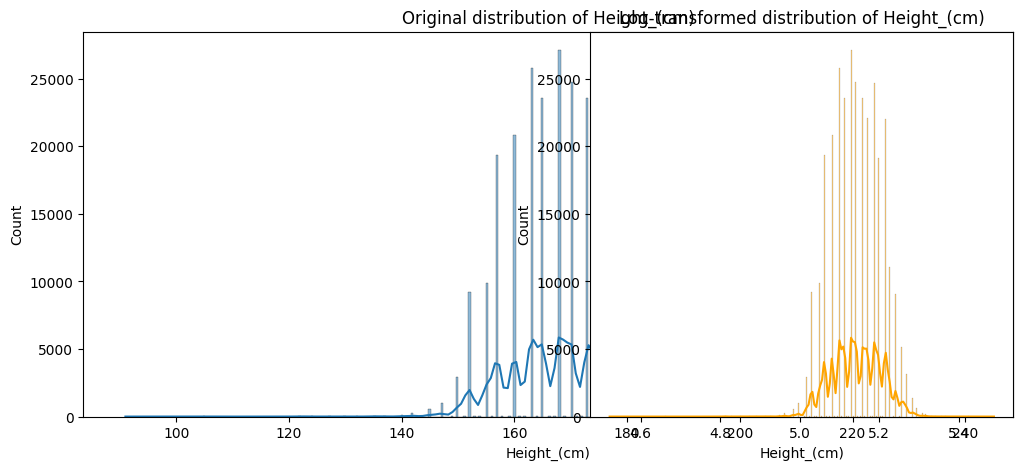

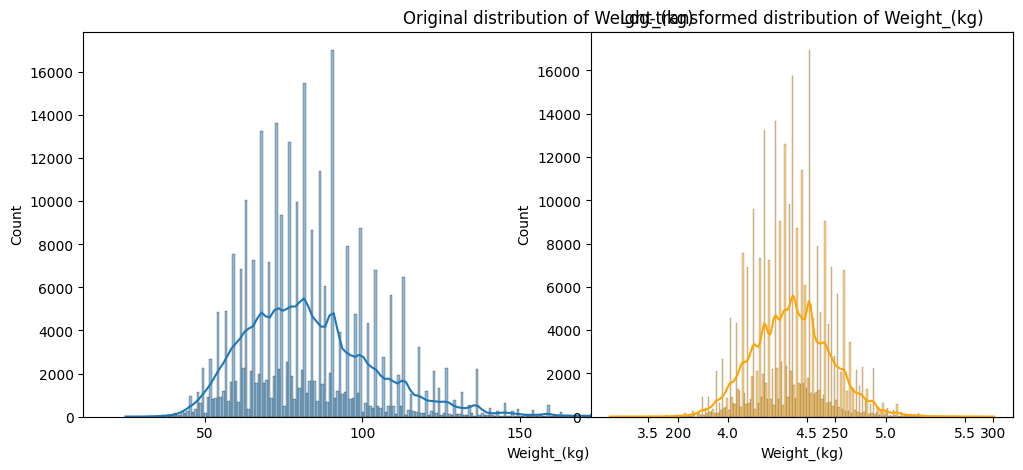

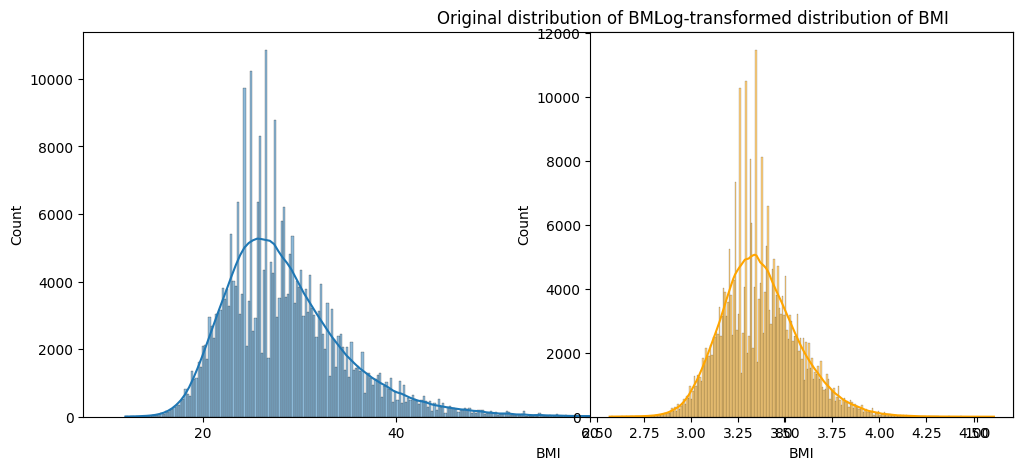

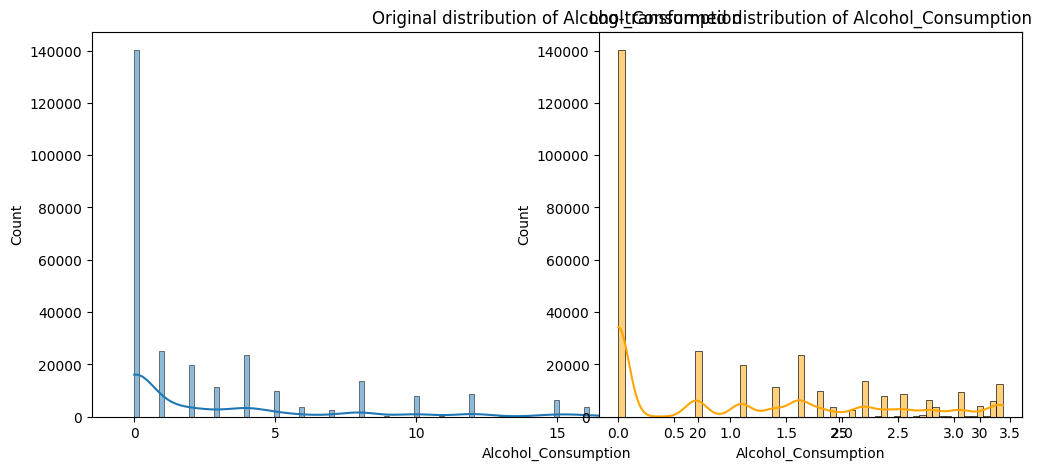

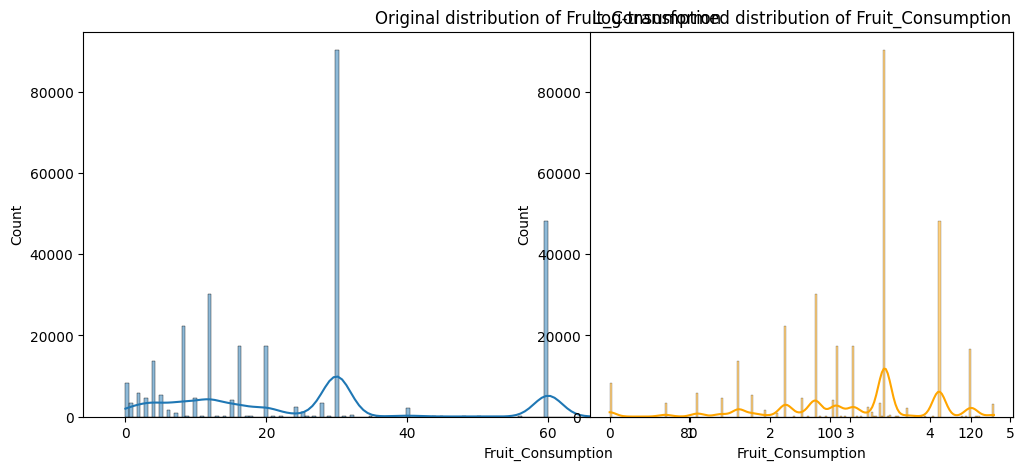

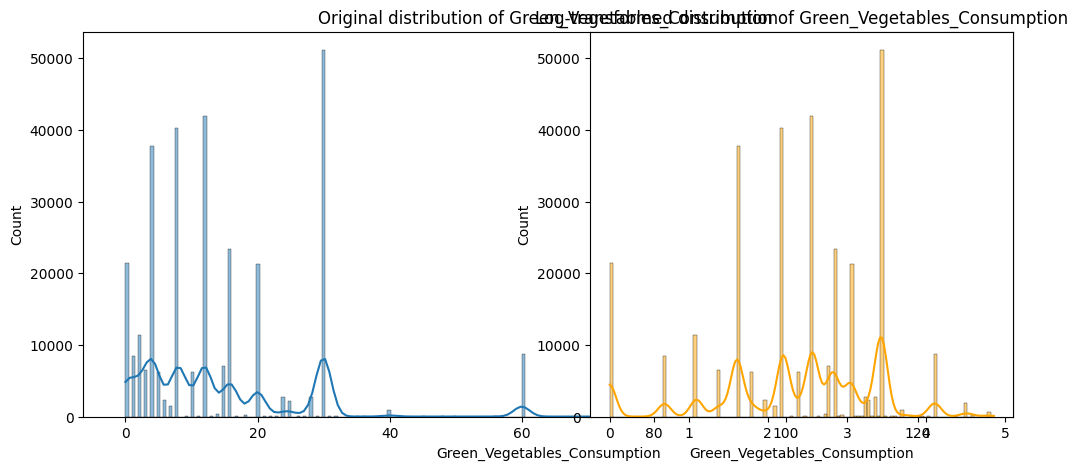

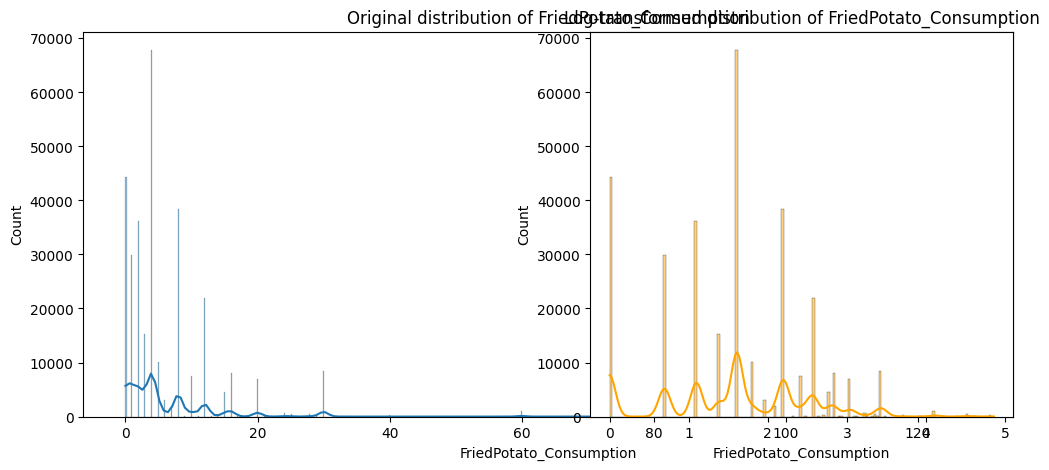

In [9]:
# Visualize skewness of important numerical/continuous features
numeric_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption']
for col in numeric_cols:
    plt.figure(figsize=(12,5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Original distribution of {col}')
    
    plt.subplot(1,2,2)

    # Apply log1p transformation (log(1+x)) to avoid log 0
    sns.histplot(np.log1p(df[col]), kde=True, color='orange')
    plt.title(f'Log-transformed distribution of {col}')

    plt.show()

In [11]:
# Step 2. Apply transformation to reduce skew
for col in numeric_cols:
    df[col+'_log'] = np.log1p(df[col]) # Creates new columns with log transform

In [13]:
# Check skewness after transformation
print('Skewness before and after log transform:')
for col in numeric_cols:
    print(f"{col}: Before={df[col].skew():.2f}, After={df[col+'_log'].skew():.2f}")

Skewness before and after log transform:
Height_(cm): Before=0.02, After=-0.20
Weight_(kg): Before=1.06, After=0.18
BMI: Before=1.38, After=0.48
Alcohol_Consumption: Before=1.89, After=0.65
Fruit_Consumption: Before=1.25, After=-0.87
Green_Vegetables_Consumption: Before=2.42, After=-0.62
FriedPotato_Consumption: Before=4.91, After=0.03


In [14]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Height_(cm)_log,Weight_(kg)_log,BMI_log,Alcohol_Consumption_log,Fruit_Consumption_log,Green_Vegetables_Consumption_log,FriedPotato_Consumption_log
0,Poor,Within the past 2 years,0,0,0,0,0,0,1,Female,...,30,16,12,5.017280,3.516310,2.743417,0.000000,3.433987,2.833213,2.564949
1,Very Good,Within the past year,0,1,0,0,0,1,0,Female,...,30,0,4,5.111988,4.358118,3.377246,0.000000,3.433987,0.000000,1.609438
2,Very Good,Within the past year,1,0,0,0,0,1,0,Female,...,12,3,16,5.099866,4.493680,3.540089,1.609438,2.564949,1.386294,2.833213
3,Poor,Within the past year,1,1,0,0,0,1,0,Male,...,30,30,8,5.198497,4.547965,3.392157,0.000000,3.433987,3.433987,2.197225
4,Good,Within the past year,0,0,0,0,0,0,0,Male,...,8,4,0,5.257495,4.493680,3.233567,0.000000,2.197225,1.609438,0.000000


In [17]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'Weight_(kg)_log', 'BMI_log', 'Alcohol_Consumption_log',
       'Fruit_Consumption_log', 'Green_Vegetables_Consumption_log',
       'FriedPotato_Consumption_log'],
      dtype='object')

In [15]:
# Drop the transformed height column
if 'Height_(cm)_log' in df.columns:
    df.drop('Height_(cm)_log', axis=1, inplace=True)

In [16]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Weight_(kg)_log,BMI_log,Alcohol_Consumption_log,Fruit_Consumption_log,Green_Vegetables_Consumption_log,FriedPotato_Consumption_log
0,Poor,Within the past 2 years,0,0,0,0,0,0,1,Female,...,0,30,16,12,3.516310,2.743417,0.000000,3.433987,2.833213,2.564949
1,Very Good,Within the past year,0,1,0,0,0,1,0,Female,...,0,30,0,4,4.358118,3.377246,0.000000,3.433987,0.000000,1.609438
2,Very Good,Within the past year,1,0,0,0,0,1,0,Female,...,4,12,3,16,4.493680,3.540089,1.609438,2.564949,1.386294,2.833213
3,Poor,Within the past year,1,1,0,0,0,1,0,Male,...,0,30,30,8,4.547965,3.392157,0.000000,3.433987,3.433987,2.197225
4,Good,Within the past year,0,0,0,0,0,0,0,Male,...,0,8,4,0,4.493680,3.233567,0.000000,2.197225,1.609438,0.000000


# Step 3. Feature Scaling & Encoding
A. Scaling Numerical Features - Important step - Some models like Logistic Regression, SVM, KNN are sensitive to feature scales. 

B. Encoding Categorical Features 

In [18]:
from sklearn.preprocessing import StandardScaler
# Select columns to scale
scale_cols=[
    'Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
    'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
    'BMI_log', 'Alcohol_Consumption_log', 'Fruit_Consumption_log',
    'Green_Vegetables_Consumption_log', 'FriedPotato_Consumption_log'
]

scaler=StandardScaler()
df_scaled=df.copy()
df_scaled[scale_cols]=scaler.fit_transform(df_scaled[scale_cols])

In [19]:
df_scaled.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Weight_(kg)_log,BMI_log,Alcohol_Consumption_log,Fruit_Consumption_log,Green_Vegetables_Consumption_log,FriedPotato_Consumption_log
0,Poor,Within the past 2 years,0,0,0,0,0,0,1,Female,...,-0.621527,0.006625,0.059597,0.664502,3.516310,-3.028379,-0.910061,0.393307,0.469585,1.083238
1,Very Good,Within the past year,0,1,0,0,0,1,0,Female,...,-0.621527,0.006625,-1.012342,-0.267579,4.358118,0.051097,-0.910061,0.393307,-2.315261,0.060136
2,Very Good,Within the past year,1,0,0,0,0,1,0,Female,...,-0.133707,-0.716973,-0.811354,1.130543,4.493680,0.842276,0.464207,-0.471177,-0.952633,1.370478
3,Poor,Within the past year,1,1,0,0,0,1,0,Male,...,-0.621527,0.006625,0.997544,0.198462,4.547965,0.123540,-0.910061,0.393307,1.060102,0.689501
4,Good,Within the past year,0,0,0,0,0,0,0,Male,...,-0.621527,-0.877772,-0.744358,-0.733620,4.493680,-0.646970,-0.910061,-0.836975,-0.733299,-1.663148


In [20]:
# Encoding multi-categorical columns
multi_cat_cols=['General_Health', 'Checkup', 'Sex', 'Age_Category']
for col in multi_cat_cols:
    print(f"{col}:{df_scaled[col].unique()}")

General_Health:['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Checkup:['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Sex:['Female' 'Male']
Age_Category:['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']


In [21]:
# Ordinal encoding Sex columns
df_scaled['Sex']=df_scaled['Sex'].map({'Female':0,'Male':1})

In [22]:
df_scaled.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Weight_(kg)_log,BMI_log,Alcohol_Consumption_log,Fruit_Consumption_log,Green_Vegetables_Consumption_log,FriedPotato_Consumption_log
0,Poor,Within the past 2 years,0,0,0,0,0,0,1,0,...,-0.621527,0.006625,0.059597,0.664502,3.516310,-3.028379,-0.910061,0.393307,0.469585,1.083238
1,Very Good,Within the past year,0,1,0,0,0,1,0,0,...,-0.621527,0.006625,-1.012342,-0.267579,4.358118,0.051097,-0.910061,0.393307,-2.315261,0.060136
2,Very Good,Within the past year,1,0,0,0,0,1,0,0,...,-0.133707,-0.716973,-0.811354,1.130543,4.493680,0.842276,0.464207,-0.471177,-0.952633,1.370478
3,Poor,Within the past year,1,1,0,0,0,1,0,1,...,-0.621527,0.006625,0.997544,0.198462,4.547965,0.123540,-0.910061,0.393307,1.060102,0.689501
4,Good,Within the past year,0,0,0,0,0,0,0,1,...,-0.621527,-0.877772,-0.744358,-0.733620,4.493680,-0.646970,-0.910061,-0.836975,-0.733299,-1.663148


In [25]:
# Implementing ordinal encoding for other multi-categorical columns
from sklearn.preprocessing import OrdinalEncoder

# Define custom orderings for each ordinal feature
ordinal_mapping={
    'General_Health': ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'],
    'Checkup': ['Never', '5 or more years ago', 'Within the past 5 years',
                'Within the past 2 years', 'Within the past year'],
    'Age_Category': ['18-24', '25-29', '30-34', '35-39', '40-44',
                     '45-49', '50-54', '55-59', '60-64', '65-69',
                     '70-74', '75-79', '80+']
}
# Columns to encode
ordinal_cols=list(ordinal_mapping.keys())

# Create encoder with specific category orders
encoder = OrdinalEncoder(categories=[ordinal_mapping[col] for col in ordinal_cols])

# Fit and transform
df_scaled[ordinal_cols] = encoder.fit_transform(df_scaled[ordinal_cols])

In [26]:
df_scaled.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Weight_(kg)_log,BMI_log,Alcohol_Consumption_log,Fruit_Consumption_log,Green_Vegetables_Consumption_log,FriedPotato_Consumption_log
0,0.0,3.0,0,0,0,0,0,0,1,0,...,-0.621527,0.006625,0.059597,0.664502,3.516310,-3.028379,-0.910061,0.393307,0.469585,1.083238
1,3.0,4.0,0,1,0,0,0,1,0,0,...,-0.621527,0.006625,-1.012342,-0.267579,4.358118,0.051097,-0.910061,0.393307,-2.315261,0.060136
2,3.0,4.0,1,0,0,0,0,1,0,0,...,-0.133707,-0.716973,-0.811354,1.130543,4.493680,0.842276,0.464207,-0.471177,-0.952633,1.370478
3,0.0,4.0,1,1,0,0,0,1,0,1,...,-0.621527,0.006625,0.997544,0.198462,4.547965,0.123540,-0.910061,0.393307,1.060102,0.689501
4,2.0,4.0,0,0,0,0,0,0,0,1,...,-0.621527,-0.877772,-0.744358,-0.733620,4.493680,-0.646970,-0.910061,-0.836975,-0.733299,-1.663148


In [27]:
print(df_scaled.dtypes)

General_Health                      float64
Checkup                             float64
Exercise                              int64
Heart_Disease                         int64
Skin_Cancer                           int64
Other_Cancer                          int64
Depression                            int64
Diabetes                             object
Arthritis                             int64
Sex                                   int64
Age_Category                        float64
Height_(cm)                         float64
Weight_(kg)                         float64
BMI                                 float64
Smoking_History                       int64
Alcohol_Consumption                 float64
Fruit_Consumption                   float64
Green_Vegetables_Consumption        float64
FriedPotato_Consumption             float64
Weight_(kg)_log                     float64
BMI_log                             float64
Alcohol_Consumption_log             float64
Fruit_Consumption_log           

In [28]:
print(df_scaled['Diabetes'].unique())

[0 1 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']


In [30]:
# Fix data type of Diabetes column and encode it properly
diabetes_mapping = {
    'No': 0,
    0: 0,  # If some were already replaced before
    'No, pre-diabetes or borderline diabetes': 1,
    'Yes, but female told only during pregnancy': 2,
    'Yes': 3,
    1: 3   # If some were already replaced before
}

df_scaled['Diabetes'] = df_scaled['Diabetes'].replace(diabetes_mapping)

C:\Users\jsrri\AppData\Local\Temp\ipykernel_21848\1538404178.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_scaled['Diabetes'] = df_scaled['Diabetes'].replace(diabetes_mapping)


In [31]:
print(df_scaled['Diabetes'].unique())
print(df_scaled['Diabetes'].dtype)

[0 3 1 2]
int64


In [32]:
print(df_scaled.dtypes)


General_Health                      float64
Checkup                             float64
Exercise                              int64
Heart_Disease                         int64
Skin_Cancer                           int64
Other_Cancer                          int64
Depression                            int64
Diabetes                              int64
Arthritis                             int64
Sex                                   int64
Age_Category                        float64
Height_(cm)                         float64
Weight_(kg)                         float64
BMI                                 float64
Smoking_History                       int64
Alcohol_Consumption                 float64
Fruit_Consumption                   float64
Green_Vegetables_Consumption        float64
FriedPotato_Consumption             float64
Weight_(kg)_log                     float64
BMI_log                             float64
Alcohol_Consumption_log             float64
Fruit_Consumption_log           

In [33]:
df_scaled.to_csv('processed_heart_data.csv', index=False)